In [9]:
import os
import keras
import tensorflow
from keras.models import Sequential
#from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
#from keras.layers import Conv2D ,MaxPooling2D,AveragePooling2D ,Flatten , Dense,Dropout,BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [11]:

# Set Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /content/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

bone-fracture-detection-using-xrays.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip '*.zip'

Archive:  bone-fracture-detection-using-xrays.zip
replace archive (6)/train/fractured/10-rotated1-rotated1-rotated1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
data = []
category = []

In [12]:
for filename in os.scandir("/content/archive (6)/train/fractured"):
    if filename.is_file():
        #print(filename.path)
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(0)
        del img

In [13]:
for filename in os.scandir("/content/archive (6)/train/not fractured"):
    if filename.is_file():
        #print(filename.path)
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(1)
        del img

In [14]:
x,y = np.array(data),category

In [16]:
x.shape

(8863, 1024)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)

In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [5]:
base_dir = '/content/archive (6)/train'
yes_dir = os.path.join(base_dir, '/content/archive (6)/train/fractured')
no_dir = os.path.join(base_dir, '/content/archive (6)/train/not fractured')

print('total have tumor images:', len(os.listdir(yes_dir)))
print('total no tumor images:', len(os.listdir(no_dir)))

total have tumor images: 4480
total no tumor images: 4383


In [6]:
yes_files = os.listdir(yes_dir)
print(yes_files[:10])

no_files = os.listdir(no_dir)
print(no_files[:10])

['95-rotated1-rotated3-rotated3.jpg', '15-rotated1-rotated1-rotated3.jpg', '40-rotated2-rotated2-rotated2.jpg', '87-rotated3-rotated1.jpg', '37-rotated2-rotated2.jpg', '83-rotated1-rotated3.jpg', '72-rotated3-rotated2-rotated3.jpg', '112-rotated3-rotated2-rotated2.jpg', '81-rotated1-rotated1-rotated3.jpg', '110-rotated3-rotated2.jpg']
['15-rotated1-rotated1-rotated3.jpg', '40-rotated2-rotated2-rotated2.jpg', '37-rotated2-rotated2.jpg', '39-rotated2-rotated2-rotated2-rotated1.jpg', '68-rotated2-rotated2-rotated2-rotated1.jpg', '54-rotated1-rotated1-rotated2-rotated1.jpg', '7-rotated2-rotated3-rotated2-rotated1.jpg', '56-rotated2-rotated3-rotated2-rotated1.jpg', '58-rotated3-rotated3-rotated1-rotated1.jpg', '68-rotated3-rotated3-rotated2-rotated1.jpg']


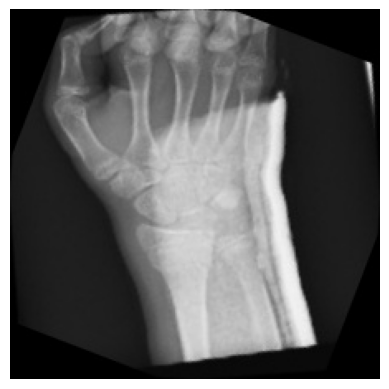

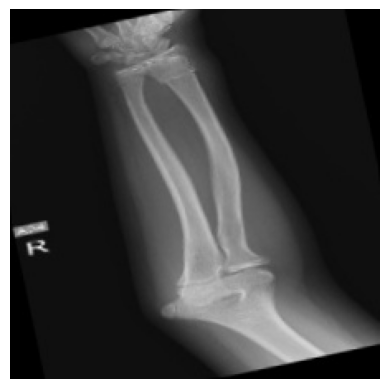

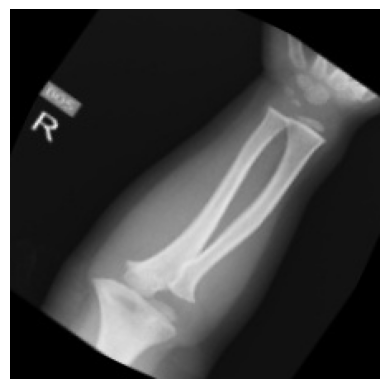

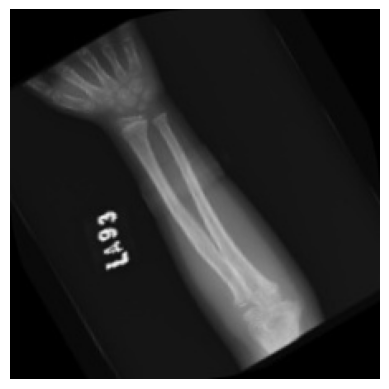

In [7]:
%matplotlib inline

pic_index = 2

next_yes = [os.path.join(yes_dir, fname)
                for fname in yes_files[pic_index-2:pic_index]]
next_no = [os.path.join(no_dir, fname)
                for fname in no_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_yes+next_no):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
dataset=[]
target=[]
for image_name in yes_files:
    image=cv2.imread(yes_dir + '/' +image_name)
    image=Image.fromarray(image)
    image=image.resize((64,64))
    dataset.append(np.array(image))
    target.append(1)

for image_name in no_files:
    image=cv2.imread(no_dir + '/' + image_name)
    image=Image.fromarray(image)
    image=image.resize((64,64))
    dataset.append(np.array(image))
    target.append(0)

In [9]:
data = np.array(dataset)
target = np.array(target)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.05,random_state=True)

In [11]:
def data_augmenter():
    '''
    Create a Sequential model composed of 2 layers
    Returns:
        tf.keras.Sequential
    '''
    ### START CODE HERE
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomRotation(0.2))
    ### END CODE HERE

    return data_augmentation

def preprocess_data(X):
    X_p = tf.keras.applications.resnet50.preprocess_input(X)
    return X_p

In [12]:
def resnet_model(X, augmentation=data_augmenter()):
    '''
    classification model
    '''

#     input_shape = X[0].shape

    model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=X[0].shape)

    model.trainable = False

    inputs = tf.keras.Input(shape=X[0].shape)

    x = augmentation(inputs)

    x = preprocess_data(x)

    x = model(x, training= False)

    x = tfl.GlobalAveragePooling2D()(x)
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.4)(x)

    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = tfl.Dense(1)

    outputs = prediction_layer(x)
    mod = tf.keras.Model(inputs, outputs)

    return mod

In [13]:
def resnet_model(X, augmentation=data_augmenter()):
    '''
    classification model
    '''

#     input_shape = X[0].shape

    model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=X[0].shape)

    model.trainable = False

    inputs = tf.keras.Input(shape=X[0].shape)

    x = augmentation(inputs)

    x = preprocess_data(x)

    x = model(x, training= False)

    x = tfl.GlobalAveragePooling2D()(x)
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.4)(x)

    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = tfl.Dense(1)

    outputs = prediction_layer(x)
    mod = tf.keras.Model(inputs, outputs)

    return mod

In [14]:
resNet = resnet_model(X_train, augmentation=data_augmenter())

In [15]:
resNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 tf.__operators__.getitem (S  (None, 64, 64, 3)        0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 64, 64, 3)        0         
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                  

In [16]:
base_learning_rate = 0.0001
resNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
initial_epochs = 50
history = resNet.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=initial_epochs)

Epoch 1/50
264/264 [==============================] - 107s 391ms/step - loss: 1.1945 - accuracy: 0.5492 - val_loss: 0.8171 - val_accuracy: 0.5653
Epoch 2/50
264/264 [==============================] - 91s 343ms/step - loss: 1.0429 - accuracy: 0.5699 - val_loss: 0.7472 - val_accuracy: 0.6014
Epoch 3/50
264/264 [==============================] - 92s 350ms/step - loss: 0.9679 - accuracy: 0.5857 - val_loss: 0.6983 - val_accuracy: 0.6261
Epoch 4/50
264/264 [==============================] - 90s 340ms/step - loss: 0.8672 - accuracy: 0.6066 - val_loss: 0.6695 - val_accuracy: 0.6374
Epoch 5/50
264/264 [==============================] - 93s 351ms/step - loss: 0.8195 - accuracy: 0.6190 - val_loss: 0.6435 - val_accuracy: 0.6486
Epoch 6/50
264/264 [==============================] - 93s 352ms/step - loss: 0.7752 - accuracy: 0.6237 - val_loss: 0.6208 - val_accuracy: 0.6667
Epoch 7/50
264/264 [==============================] - 90s 342ms/step - loss: 0.7354 - accuracy: 0.6387 - val_loss: 0.6152 - val_a

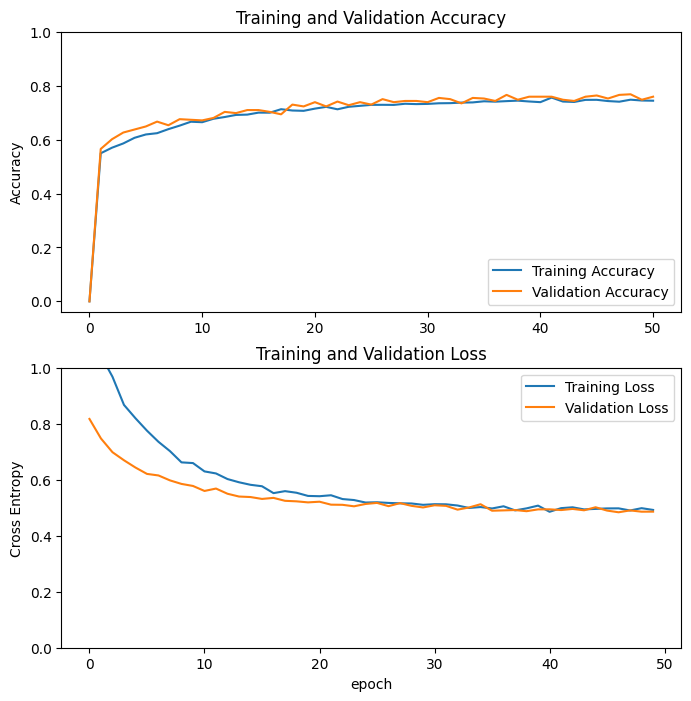

In [18]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [19]:
def resnet_model_2(X, augmentation=data_augmenter()):
    '''
    classification model
    '''

#     input_shape = X[0].shape

    model_2 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=X[0].shape)

    # Fine-tune from this layer onwards
    fine_tune_at = 165


    # Freeze all the layers before the `fine_tune_at` layer
    for layer in model_2.layers[:fine_tune_at]:
        #print('Layer ' + layer.name + ' frozen.')
        layer.trainable = False

    inputs = tf.keras.Input(shape=X[0].shape)

    x = augmentation(inputs)

    x = preprocess_data(x)

    x = model_2(x)

    x = tfl.GlobalAveragePooling2D()(x)
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.6)(x)

    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = tfl.Dense(1,activation="sigmoid")

    outputs = prediction_layer(x)
    mod_2 = tf.keras.Model(inputs, outputs)

    return mod_2

In [20]:
resNet_2 = resnet_model_2(X_train, augmentation=data_augmenter())

In [21]:
resNet_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 tf.__operators__.getitem_1   (None, 64, 64, 3)        0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 64, 64, 3)        0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0   

In [22]:
resNet_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 50
history_2 = resNet_2.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=initial_epochs)

NameError: ignored

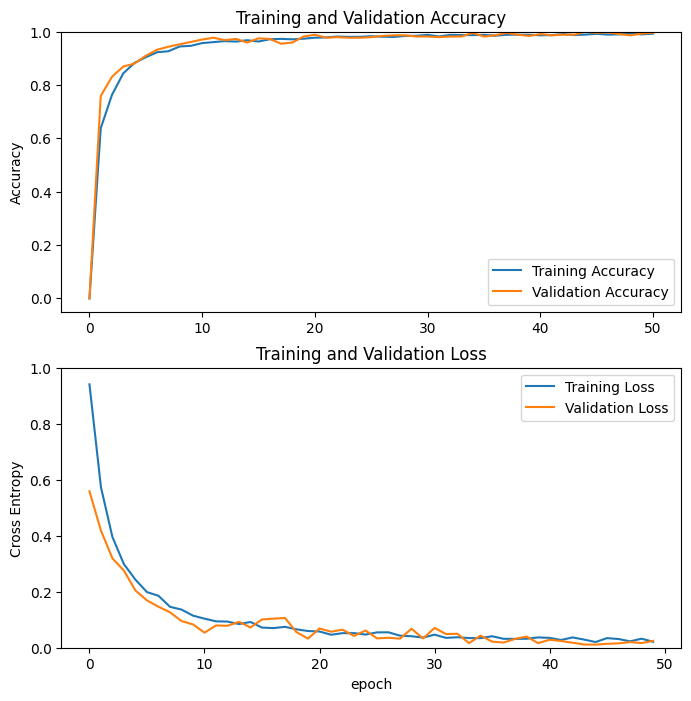

In [24]:
acc = [0.] + history_2.history['accuracy']
val_acc = [0.] + history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()